In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# import data
df = pd.read_csv('mountains_vs_beaches_preferences.csv')
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,female,85325,master,3,hiking,1762,suburban,51,262,fall,1,0,1
52440,37,female,110346,bachelor,7,swimming,1676,urban,259,84,spring,1,0,0
52441,53,non-binary,71080,doctorate,7,swimming,3877,urban,164,27,fall,0,1,0
52442,40,female,75174,doctorate,9,swimming,4620,suburban,173,10,summer,0,1,0


## Test IF Education Affect the preference between Beach and Mountain

In the following code, we tested whether education level influences customers' preference for beaches or mountains. The chosen statistical method is the Chi-Squared test, which is appropriate for examining the independence or association between two categorical variables. In this case, both preferences and education levels are categorical.

To perform the analysis, we first selected the relevant columns (Education Level and Preferences) and structured the data to fit the requirements of the Chi-Squared test. Using statistical packages in Python, we conducted the test and evaluated the resulting p-value to assess significance.

Additionally, we visualized the results using a heatmap and a 3D plot of residuals. These visualizations highlight which groups show significant deviations and the direction of those deviations, providing deeper insights into the relationship between the variables.

Contingency Table:
Preference           0     1
Education_Level             
bachelor          9788  3339
doctorate        10065  3228
high school       9722  3350
master            9721  3231

Chi-Squared Statistic: 7.581749749051974
P-value: 0.055494741012120444
Degrees of Freedom: 3
Expected Frequencies:
[[9835.98871177 3291.01128823]
 [9960.37159637 3332.62840363]
 [9794.77751506 3277.22248494]
 [9704.8621768  3247.1378232 ]]

There is a statistically significant difference in Preference across Education Levels.


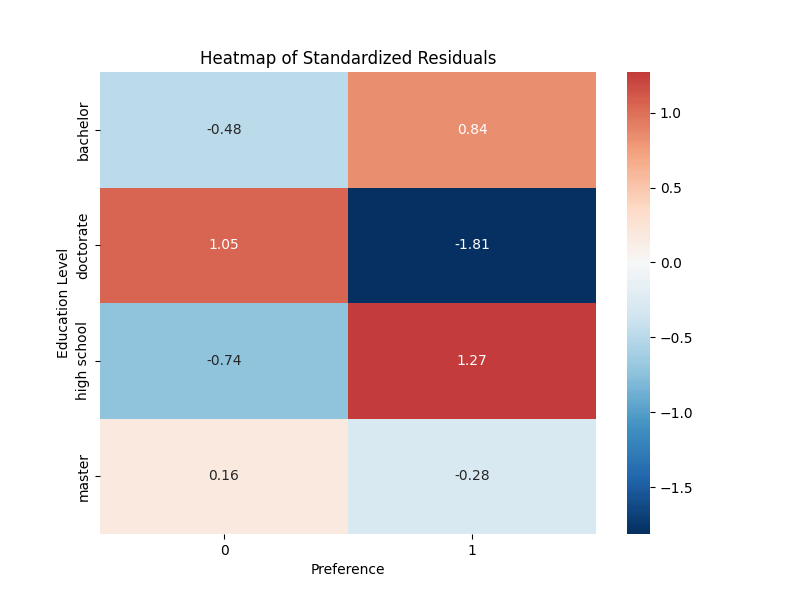

In [3]:

contingency_table = pd.crosstab(df['Education_Level'], df['Preference'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpret the results
alpha = 0.1
if p < alpha:
    print("\nThere is a statistically significant difference in Preference across Education Levels.")
else:
    print("\nNo statistically significant difference in Preference across Education Levels.")

# Calculate standardized residuals
observed = contingency_table.values  # Observed frequencies
standardized_residuals = (observed - expected) / (expected ** 0.5)

residuals_df = pd.DataFrame(
    standardized_residuals,
    index=contingency_table.index,
    columns=contingency_table.columns
)

plt.figure(figsize=(8, 6))
sns.heatmap(residuals_df,annot=True, fmt=".2f",cmap="RdBu_r", center=0)
plt.title("Heatmap of Standardized Residuals")
plt.xlabel("Preference")
plt.ylabel("Education Level")
plt.show()

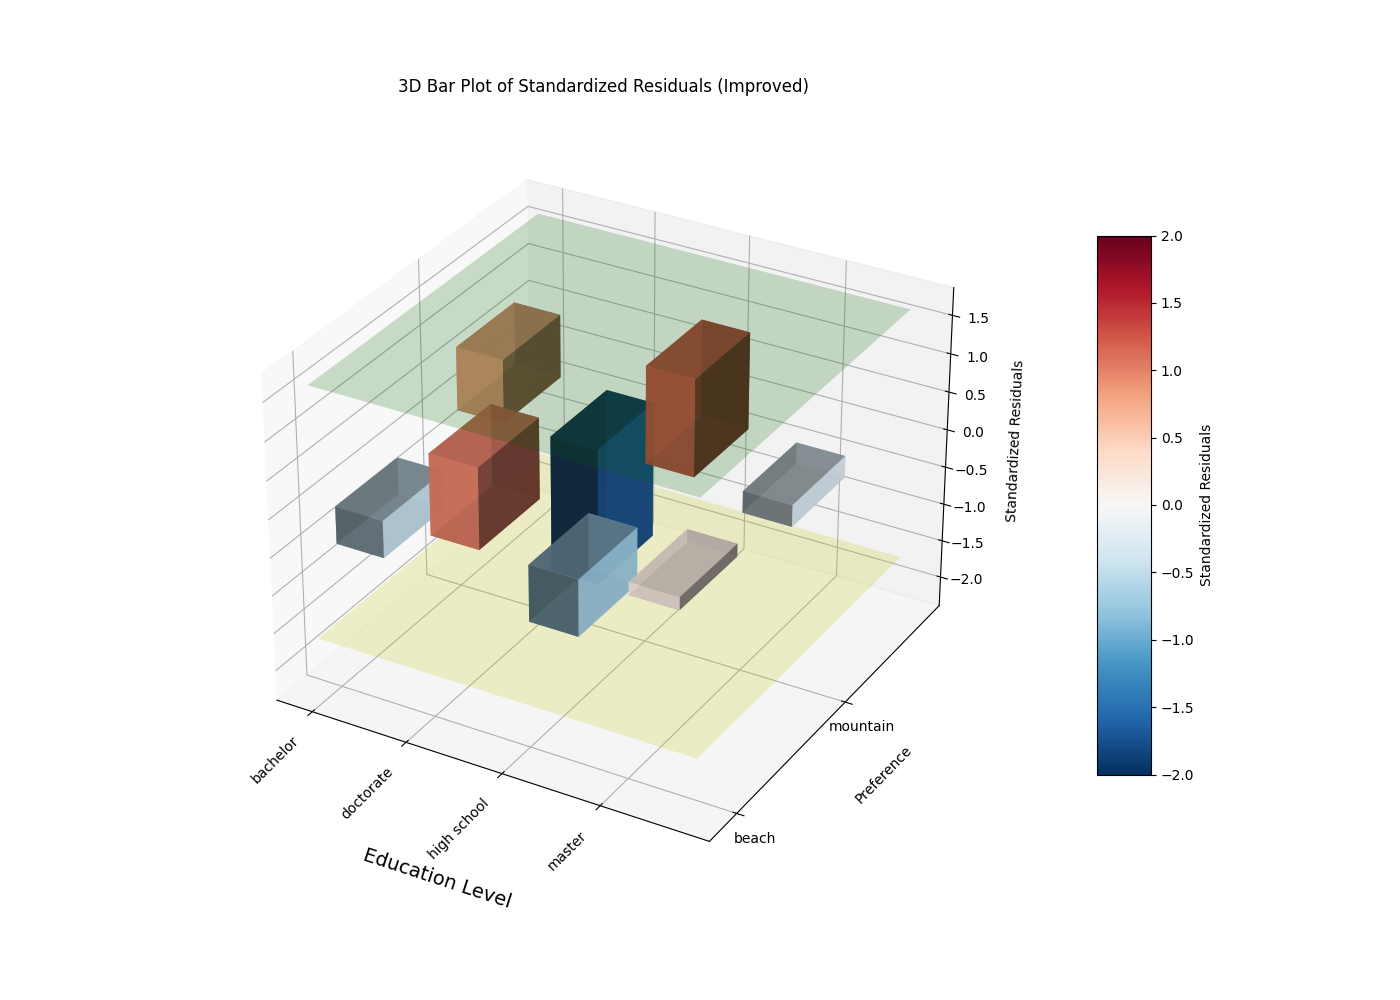

In [4]:
# 3D PLOT
x_labels = contingency_table.index.tolist()  # Education levels
y_labels = ['beach','mountain']
x_pos, y_pos = np.meshgrid(np.arange(len(x_labels)), np.arange(len(y_labels)), indexing="ij")

# Flatten the data for easier plotting
x_pos_flat = x_pos.ravel()
y_pos_flat = y_pos.ravel()
z_pos_flat = np.zeros_like(x_pos_flat) 
residuals_flat = standardized_residuals.ravel()

# Bar heights correspond to residuals
bar_heights = residuals_flat

# Colors based on residual values with increased saturation
from matplotlib.colors import Normalize, ListedColormap
colormap = plt.cm.RdBu_r  # Brighter diverging colormap
norm = Normalize(vmin=-2, vmax=2)  # Normalize to standard thresholds
colors = colormap(norm(bar_heights))

fig = plt.figure(figsize=(14, 10))
ax2 = fig.add_subplot(111, projection='3d')

bars = ax2.bar3d(
    x_pos_flat, y_pos_flat, z_pos_flat,  # Bar positions
    dx=0.5, dy=0.5, dz=bar_heights,     # Bar dimensions
    color=colors, alpha=0.8
)


ax2.set_xticks(np.arange(len(x_labels)))
ax2.set_xticklabels(x_labels, rotation=45, ha='right')  # Rotate and align x-axis labels
ax2.set_yticks(np.arange(len(y_labels)))
ax2.set_yticklabels(y_labels)
ax2.set_xlabel("Education Level", labelpad=35, fontsize=14)  # Add padding for better spacing
ax2.set_ylabel("Preference", labelpad=15)
ax2.set_zlabel("Standardized Residuals", labelpad=10)

z_min, z_max = bar_heights.min(), bar_heights.max()
ax2.set_zlim(z_min - 0.5, z_max + 0.5)  

x_range = np.arange(-0.1, len(x_labels) - 0.1, 0.1) 
y_range = np.arange(-0.1, len(y_labels) - 0.1, 0.1) 
x_plane, y_plane = np.meshgrid(x_range, y_range)

# Positive threshold plane
ax2.plot_surface(
    x_plane, y_plane,  # Plane position
    np.full_like(x_plane, 1.645),  # Z-value for +1.645
    color='green', alpha=0.2, edgecolor='none'  # Transparent green plane
)

# Negative threshold plane
ax2.plot_surface(
    x_plane, y_plane,  # Plane position
    np.full_like(x_plane, -1.645),  # Z-value for -1.645
    color='yellow', alpha=0.2, edgecolor='none'  # Transparent red plane
)

# Add a color bar for residuals
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=norm), ax=ax2, shrink=0.7, aspect=10, pad=0.1)
cbar.set_label("Standardized Residuals")

# Add a title
plt.title("3D Bar Plot of Standardized Residuals (Improved)", pad=20)
plt.show()

When evaluating the differences between groups, we set the alpha level (𝛼) to 0.1. This relatively higher threshold for significance reflects our decision to tolerate a certain level of Type I error (false positives) to ensure that more potential differences are detected. In this context, minimizing Type II errors (false negatives) is more critical because missing meaningful differences could negatively impact the ability to customize recommendations. By contrast, the consequences of false positives (Type I errors) are less severe in this application.

The p-value of 0.05549 indicates that the observed differences are statistically significant at the 0.1 significance level but not at the more stringent 0.05 level. This suggests there is moderate evidence to reject the null hypothesis, implying that education level may influence customers' preference for beaches or mountains.

From the heatmap and 3D plots of standardized residuals, we observe that the most significant difference between expected and actual values is found in the preferences of individuals with a doctorate for mountains (-1.8). Specifically, individuals with a doctorate are statistically less likely to prefer mountain travel than expected.



## Test If Preferred Activity Affect the preference between Beach and Mountain

The same approach was employed to test whether Preferred Activity affects the preference between Beach and Mountain. While we may have some intuition about how different activity preferences might influence preferences between mountain and beach, it is important to validate these assumptions statistically to ensure that our recommendations are both accurate and useful.

Contingency Table:
Preference                0     1
Preferred_Activities             
hiking                 6539  6563
skiing                 6582  6585
sunbathing            13221     0
swimming              12954     0

Chi-Squared Statistic: 17484.405386952938
P-value: 0.0
Degrees of Freedom: 3
Expected Frequencies:
[[9817.25634963 3284.74365037]
 [9865.96049119 3301.03950881]
 [9906.42239341 3314.57760659]
 [9706.36076577 3247.63923423]]

There is a statistically significant difference in Preference across Education Levels.


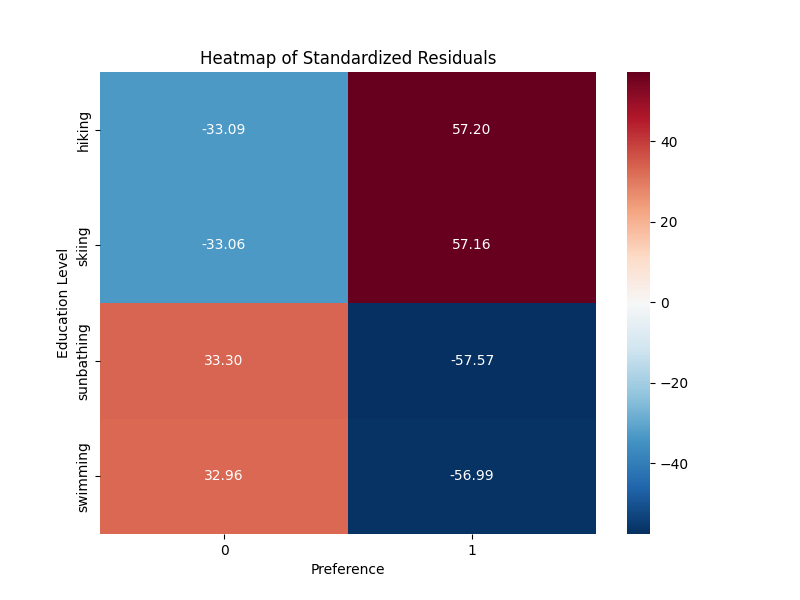

In [13]:
contingency_table = pd.crosstab(df['Preferred_Activities'], df['Preference'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpret the results
alpha = 0.1
if p < alpha:
    print("\nThere is a statistically significant difference in Preference across Education Levels.")
else:
    print("\nNo statistically significant difference in Preference across Education Levels.")

# Calculate standardized residuals
observed = contingency_table.values  # Observed frequencies
standardized_residuals = (observed - expected) / (expected ** 0.5)

residuals_df = pd.DataFrame(
    standardized_residuals,
    index=contingency_table.index,
    columns=contingency_table.columns
)

plt.figure(figsize=(8, 6))
sns.heatmap(residuals_df,annot=True, fmt=".2f",cmap="RdBu_r", center=0)
plt.title("Heatmap of Standardized Residuals")
plt.xlabel("Preference")
plt.ylabel("Education Level")
plt.show()

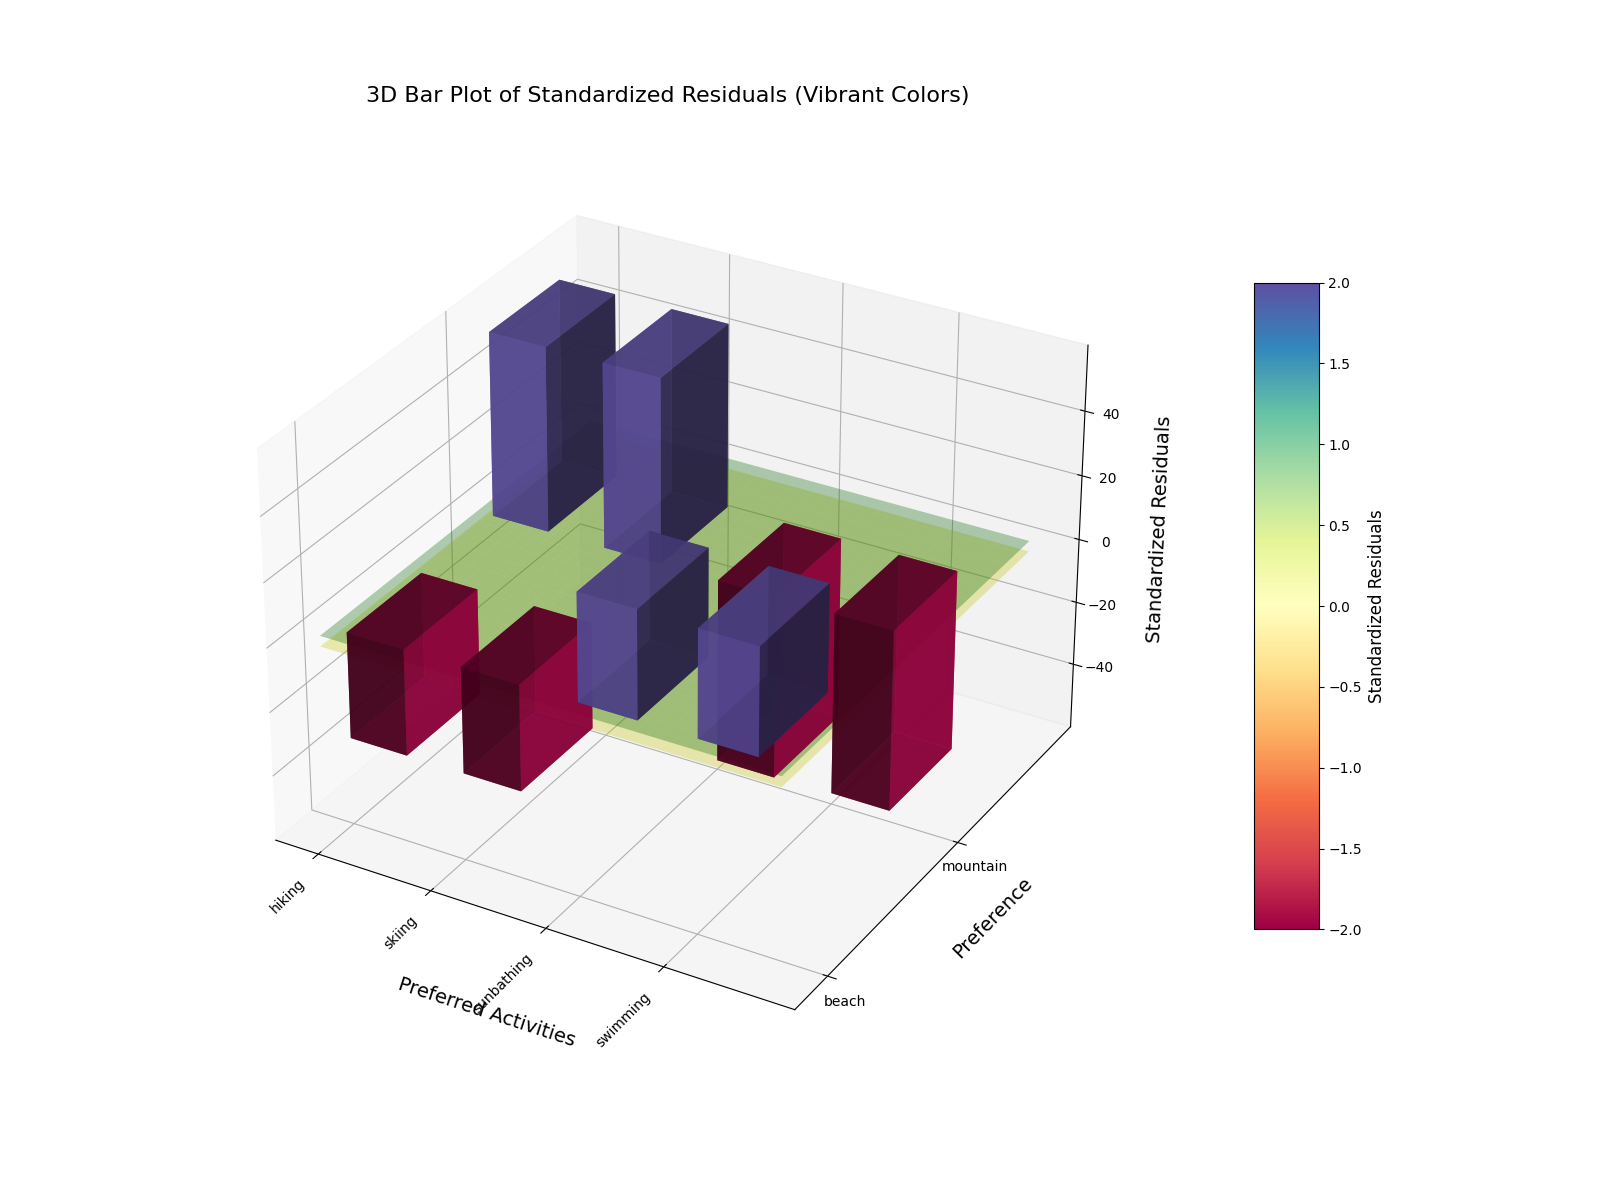

In [14]:
# Step 1: Create a contingency table for Preference by Education_Level
contingency_table = pd.crosstab(df['Preferred_Activities'], df['Preference'])

# Step 2: Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Calculate standardized residuals
observed = contingency_table.values  # Observed frequencies
standardized_residuals = (observed - expected) / (expected ** 0.5)

# Step 4: Prepare data for plotting
x_labels = contingency_table.index.tolist()  # Activities
y_labels = ['beach', 'mountain']
x_pos, y_pos = np.meshgrid(np.arange(len(x_labels)), np.arange(len(y_labels)), indexing="ij")

# Flatten the data for easier plotting
x_pos_flat = x_pos.ravel()
y_pos_flat = y_pos.ravel()
z_pos_flat = np.zeros_like(x_pos_flat)  # All bars start at 0
residuals_flat = standardized_residuals.ravel()

# Bar heights correspond to residuals
bar_heights = residuals_flat

# Colors based on residual values with vibrant colormap
from matplotlib.colors import Normalize
colormap = plt.cm.Spectral  # Vibrant colormap
norm = Normalize(vmin=-2, vmax=2)  # Normalize to standard thresholds
colors = colormap(norm(bar_heights))

# Step 5: Create a 3D bar plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the bars
bars = ax.bar3d(
    x_pos_flat, y_pos_flat, z_pos_flat,  # Bar positions
    dx=0.5, dy=0.5, dz=bar_heights,     # Bar dimensions
    color=colors, alpha=0.8
)

# Set axis labels
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Rotate and align x-axis labels
ax.set_yticks(np.arange(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel("Preferred Activities", labelpad=25, fontsize=14)  # Add padding for better spacing
ax.set_ylabel("Preference", labelpad=15, fontsize=14)
ax.set_zlabel("Standardized Residuals", labelpad=15, fontsize=14)

# Adjust Z axis to show negative values
z_min, z_max = bar_heights.min(), bar_heights.max()
ax.set_zlim(z_min - 0.5, z_max + 0.5)  # Extend slightly beyond min/max for visibility

# Add transparent threshold planes for ±1.645
x_range = np.arange(-0.1, len(x_labels) - 0.1, 0.1)  # Cover x-axis range
y_range = np.arange(-0.1, len(y_labels) - 0.1, 0.1)  # Cover y-axis range
x_plane, y_plane = np.meshgrid(x_range, y_range)

# Positive threshold plane
ax.plot_surface(
    x_plane, y_plane,  # Plane position
    np.full_like(x_plane, 1.645),  # Z-value for +1.645
    color='green', alpha=0.3, edgecolor='none'  # More transparent green plane
)

# Negative threshold plane
ax.plot_surface(
    x_plane, y_plane,  # Plane position
    np.full_like(x_plane, -1.645),  # Z-value for -1.645
    color='yellow', alpha=0.3, edgecolor='none'  # More transparent red plane
)

# Add a color bar for residuals
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=norm), ax=ax, shrink=0.7, aspect=10, pad=0.1)
cbar.set_label("Standardized Residuals", fontsize=12)

# Add a title
plt.title("3D Bar Plot of Standardized Residuals (Vibrant Colors)", pad=30, fontsize=16)
plt.show()

Using a Chi-Squared test, the p-value = 0.0 indicates a statistically significant difference between preferences across the different activity groups.There is strong evidence that Preferred Activities significantly influence customers' preferences between Beach and Mountain. Specifically:
Hiking and Skiing align with Mountain preferences. Sunbathing and Swimming align with Beach preferences.

## In the following code, we analyzed how various numerical factors influence people's preferences.

 To achieve this, we performed a median split on the datasets to categorize the numerical variables and then conducted Chi-Squared tests to assess potential associations. Additionally, we employed logistic regression to validate the results. The analysis revealed that factors such as income, budget, and age do not significantly impact people's preference between beach and mountain.

### Test If Income Level Affect customers' preference between Beach and Mountain

Chi-Squared statistic: 1.905148804229771, with p-value: 0.1675031345224971
No significant difference


Preference,0,1
Income_Category,,
High,19717,6505
Low,19579,6643


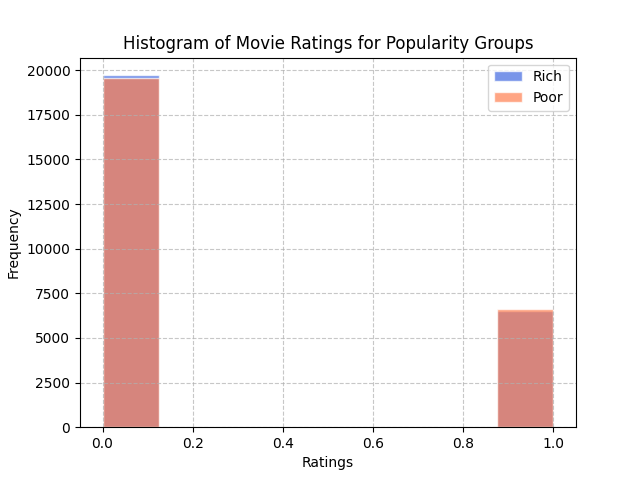

In [7]:
# Conduct median split
median_income = df['Income'].median()

# Separate the ratings into two different groups based on income
mask = df['Income'] >= median_income
high_income = df[mask]
low_income = df[~mask]
df['Income_Category'] = ['High' if income >= median_income else 'Low' for income in df['Income']]

# Create a contingency table for Income_Category vs. Preference
contingency_table = pd.crosstab(df['Income_Category'], df['Preference'])

# Perform the Chi-Squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared statistic: {chi2_stat}, with p-value: {p_value}")
if p_value <= 0.005:
    print("Significant difference")
else:
    print("No significant difference")

fig, ax1 = plt.subplots()

# Histogram 
ax1.hist(high_income['Preference'], bins=8, alpha=0.7, color='royalblue', label='Rich', edgecolor='white')
ax1.hist(low_income['Preference'], bins=8, alpha=0.7, color='coral', label='Poor', edgecolor='white')
ax1.set_title('Histogram of Movie Ratings for Popularity Groups')
ax1.set_xlabel('Ratings')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(visible=True, linestyle="--", alpha=0.7)

contingency_table

In [8]:
# Fit the logistic regression model

X = df['Income']  # Independent variable
y = df['Preference']  # Dependent variable

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
model_summary = model.summary()
model_summary

Optimization terminated successfully.
         Current function value: 0.563104
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Preference   No. Observations:                52444
Model:                          Logit   Df Residuals:                    52442
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:               7.979e-06
Time:                        17:21:19   Log-Likelihood:                -29531.
converged:                       True   LL-Null:                       -29532.
Covariance Type:            nonrobust   LLR p-value:                    0.4924
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0781      0.026    -40.812      0.000      -1.130      -1.026
Income     -2.398e-07   3.49e-07     -0.687      0.492   -9.24e-07    4.45e-07
==============================================================================
"""

### Test IF Budget Affect the preference between Beach and Mountain

Chi-Squared statistic: 1.8366763878801915, with p-value: 0.17534099499773848
No significant difference


Preference,0,1
Budget_Category,,
High,19724,6509
Low,19572,6639


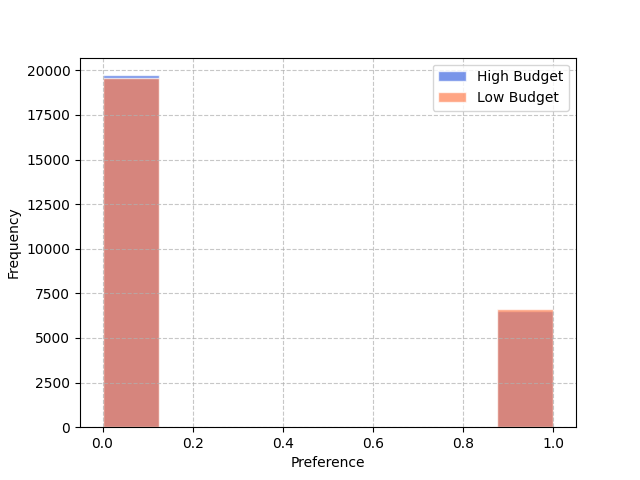

In [9]:
# Conduct median split
median_budget = df['Vacation_Budget'].median()

mask = df['Vacation_Budget'] >= median_budget
high_budget = df[mask]
low_budget = df[~mask]
df['Budget_Category'] = ['High' if budget >= median_budget else 'Low' for budget in df['Vacation_Budget']]

# Create a contingency table for Income_Category vs. Preference
contingency_table = pd.crosstab(df['Budget_Category'], df['Preference'])

# Perform the Chi-Squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared statistic: {chi2_stat}, with p-value: {p_value}")
if p_value <= 0.005:
    print("Significant difference")
else:
    print("No significant difference")

fig, ax2 = plt.subplots()
# Histogram 
ax2.hist(high_budget['Preference'], bins=8, alpha=0.7, color='royalblue', label='High Budget', edgecolor='white')
ax2.hist(low_budget['Preference'], bins=8, alpha=0.7, color='coral', label='Low Budget', edgecolor='white')
ax2.set_xlabel('Preference')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(visible=True, linestyle="--", alpha=0.7)

contingency_table

In [10]:
# Logistic Regression
X = df['Vacation_Budget']  # Independent variable
y = df['Preference']  # Dependent variable

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
model_summary = model.summary()
model_summary

Optimization terminated successfully.
         Current function value: 0.563098
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Preference   No. Observations:                52444
Model:                          Logit   Df Residuals:                    52442
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:               2.006e-05
Time:                        17:21:21   Log-Likelihood:                -29531.
converged:                       True   LL-Null:                       -29532.
Covariance Type:            nonrobust   LLR p-value:                    0.2763
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0717      0.024    -45.578      0.000      -1.118      -1.026
Vacation_Budget -8.457e-06   7.77e-06     -1.089      0.276   -2.37e-05    6.77e-06
===================================================================================
"""

### TEST IF Age Affect the preference between Beach and Mountain¶

Chi-Squared statistic: 0.052909736624829284, with p-value: 0.8180753228733411
No significant difference


Preference,0,1
Age_Category,,
Old,20359,6796
Young,18937,6352


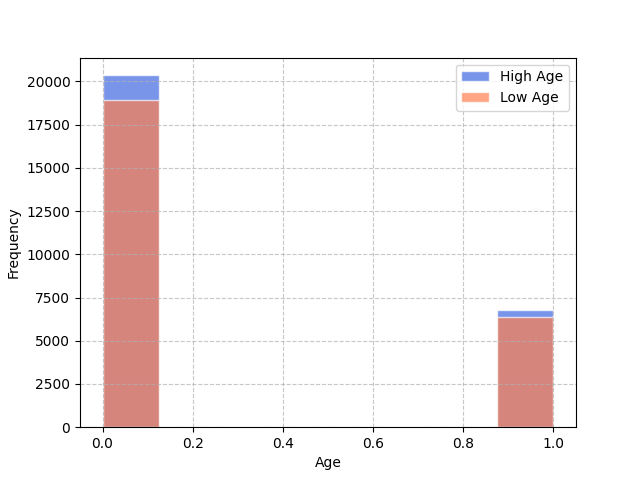

In [11]:
## Conduct median split
median_age = df['Age'].median()

# Separate the ratings into two different groups based on income
mask = df['Age'] >= median_age
high_age = df[mask]
low_age = df[~mask]
df['Age_Category'] = ['Old' if age >= median_age else 'Young' for age in df['Age']]

# Create a contingency table for Income_Category vs. Preference
contingency_table = pd.crosstab(df['Age_Category'], df['Preference'])

# Perform the Chi-Squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared statistic: {chi2_stat}, with p-value: {p_value}")
if p_value <= 0.005:
    print("Significant difference")
else:
    print("No significant difference")

fig, ax3 = plt.subplots()
# Histogram 
ax3.hist(high_age['Preference'], bins=8, alpha=0.7, color='royalblue', label='High Age', edgecolor='white')
ax3.hist(low_age['Preference'], bins=8, alpha=0.7, color='coral', label='Low Age', edgecolor='white')
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(visible=True, linestyle="--", alpha=0.7)

contingency_table

In [12]:
# Fit the logistic regression model
X = df['Age']  # Independent variable
y = df['Preference']  # Dependent variable

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
model_summary = model.summary()
model_summary

Optimization terminated successfully.
         Current function value: 0.563108
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Preference   No. Observations:                52444
Model:                          Logit   Df Residuals:                    52442
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:               8.704e-07
Time:                        17:21:22   Log-Likelihood:                -29532.
converged:                       True   LL-Null:                       -29532.
Covariance Type:            nonrobust   LLR p-value:                    0.8206
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1015      0.031    -35.592      0.000      -1.162      -1.041
Age            0.0002      0.001      0.227      0.821      -0.001       0.001
==============================================================================
"""